<font color='#2F4F4F'>  
    
# Анализ и приоритезация гипотез по увеличению выручки

    
<font color='#2F4F4F'> 
    
    
## Описание исследования 
    
    
### Мне доступны 9 гипотез по увеличению выручки интернет-магазина. Анализ этих гипотез пройдет в два этапа, что позволит максимально точно и эффективно добиться желаемого результата. 

    
### Цель исследования:
    
    
   
    
- Выявить наиболее верные гипотезы, которые приведут к увеличению выручки интернет-магазина.
    
- Проанализировать A/B тест
    
    
### Ход исследования
    
Данные я получу из файлов '/datasets/hypothesis.csv', '/datasets/orders.csv', '/datasets/visitors.csv', так как мне неизвестно ничего о качестве данных, перед тем, как  приступать к целям исследования, понадобится обзор данных.
    
Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки, я поищу возможность исправить все ошибки в данных, которые не приведут к искажению конечного результата. 
    
### Таким образом, мое исследование пройдет в 5 этапов:

* Обзор данных
    
* Предобработка данных 
    
* Приоритезация гипотез
    
* Анализ A/B теста 
    
* Вывод и рекомендации <font>

<font color='#2F4F4F'>  
    
    
## Приступим. Прочитаем данные, посмотрим информацию о них.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
import scipy.stats as st
import warnings



In [2]:
try:
    hyp=pd.read_csv('/datasets/hypothesis.csv', sep=',')
except:
    hyp=pd.read_csv(r'C:\Users\kater\Downloads\hypothesis.csv', sep=',')
try:
    orders=pd.read_csv('/datasets/orders.csv', sep=',')
except:
    orders=pd.read_csv(r'C:\Users\kater\Downloads\orders.csv', sep=',')
try:
    visitors=pd.read_csv('/datasets/visitors.csv', sep=',')
except:
    visitors=pd.read_csv(r'C:\Users\kater\Downloads\visitors.csv', sep=',')

In [3]:
# снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

# игнорируем предупреждения
warnings.filterwarnings(action='ignore')

# выставляем ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.3f}'.format

# задаем размер графика
sns.set(rc={'figure.figsize':(9,5)})

In [4]:
hyp.head(9)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


<font color='#2F4F4F'> 

Итак, в датафрейме hyp нам представлены следующие параметры:
  
    
<font color='#2F4F4F'>
    
    
- Hypothesis — краткое описание гипотезы;
    
    
- Reach — охват пользователей по 10-балльной шкале;
    
    
- Impact — влияние на пользователей по 10-балльной шкале;
    
    
- Confidence — уверенность в гипотезе по 10-балльной шкале;
    
    
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. <font>

In [6]:
orders.head(15)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
print('максимальная дата:', max(orders['date']))
print('минимальная дата:', min(orders['date']))

максимальная дата: 2019-08-31
минимальная дата: 2019-08-01


<font color='#2F4F4F'>  
    
В датафрейме orders нам представлены следующая информация о заказах:
    
- transactionId — идентификатор заказа;
    
- visitorId — идентификатор пользователя, совершившего заказ;
    
- date — дата, когда был совершён заказ;
    
- revenue — выручка заказа;
    
- group — группа A/B-теста, в которую попал заказ.

In [9]:
visitors.head(15)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
print('максимальная дата:', max(visitors['date']))
print('минимальная дата:', min(visitors['date']))

максимальная дата: 2019-08-31
минимальная дата: 2019-08-01


<font color='#2F4F4F'>  
    
В датафрейме orders нам представлены следующая информация о пользователях:
    
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

<font color='#2F4F4F'> 
    
## Приступим к предобработке данных:
    
    
Для удобства, я переведу название столбцов датафрейма hyp в нижний регистр и переименую некоторык столбцы датафрейма orders

In [12]:
hyp.columns=hyp.columns.str.lower()
orders=orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'})

<font color='#2F4F4F'>  Убедимся, что в данных нет дубликатов:

In [13]:
hyp.duplicated().sum()
orders.duplicated().sum()
visitors.duplicated().sum()

0

<font color='#2F4F4F'> И пропусков:

In [14]:
hyp.isna().sum()
orders.isna().sum()
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

<font color='#2F4F4F'> 

Переведем столбцы с датой в нужный тип для удобства работы с ними:

In [15]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

<font color='#2F4F4F'>  Исключим также тех пользователей, которые попали в две группы одновременно, чтобы выводы были максимально точным.

In [16]:
dubls = orders.groupby('visitor_id').agg(
    {'group': 'nunique'}).query('group == 2').reset_index()['visitor_id'].tolist() 

In [17]:
orders = orders.query('visitor_id not in @dubls').copy()

<font color='#2F4F4F'> 
 
## Итак, на этом этапе я:
    
    
- Познакомилась со структурой данных, с которыми предстоит работать
    
    
- Привела названия столбцов к нижнему регистру и поменяла названия некоторых столбцов для упрощения работы с ними
    
    
- Убедилась в качестве данных
    
    
- Поменяла тип данных в столбцах с датой для удобства работы с ними
    
    
- Исключила пользователей, которые находятся в двух группах сразу

<font color='#2F4F4F'> 
    
# Часть 1

<font color='#2F4F4F'> 
    
## Приступим к приоритизации гипотез.

<font color='#2F4F4F'>  Для начала применим фреймворк ICE и отсортируем результат по убыванию приоритета.

In [18]:
hyp['ICE']=round(hyp['impact']*hyp['confidence']/hyp['efforts'],2)
print(hyp[['hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

<font color='#2F4F4F'> 
    
### Итак, мы можем сделать вывод (исходя из параметра ICE), что наиболее правильно будет приоритезировать гипотезу номер 8, то есть запустить акцию, дающую скидку на товар в день рождения. Достаточно логично, так как влияние у нее довольно большое, как и уверенность в данной гипотезе, а затраты ресурсов относительно маленькие. Посмотрим, что нам покажут другой способ приоритезации гипотез.

<font color='#2F4F4F'> Далее применим фреймворк RICE и также отсортируем результат по убыванию приоритета.

In [19]:
hyp['RICE']=(hyp['reach']*hyp['impact']*hyp['confidence'])/hyp['efforts']
print(hyp[['hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

<font color='#2F4F4F'> Здесь мы видим некоторые изменения, приоритет стоит отдать гипотезе номер 7, то есть стоит добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. Более того, приоритетная задача из предыдущего вывода находится на пятом месте из девяти возможных. Эта разница объясняется тем, что фреймворк RICE, помимо всего прочего, берет во внимание параметр reach, который обозначает охват пользователей. У предыдущей гипотезы охват минимальный, у гипотезы номер 7,в свою очередь, охват максимальный из возможных.

<font color='#2F4F4F'> 
    
# Какой вывод мы можем сделать по результатам первой части нашего исследования?
    
## Я бы рекомендовала отдать приоритет гипотезам 7, 2, 0, 6, то есть тем, которые заняли лидирующие позиции фреймворка RICE, так как он охватывает большее количество параметров и, соответственно, более точный в результатах.

<font color='#2F4F4F'> 
    
# Часть 2

<font color='#2F4F4F'>  
    
## Для того, чтобы построить нужные нам графики, нам нужно собрать кумулятивные данные. Создадим датафрейм cumulative, в котором соберем все нужные значения со столбцами: 
    
    
- date — дата;
    
    
- group — группа A/B-теста (A или B);
    
    
- orders — кумулятивное количество заказов на указанную дату в указанной группе;
    
    
- buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
    
    
- revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
    
    
- visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

<font color='#2F4F4F'>  Для этого сначала оставим только уникальные пары значений дат и групп теста

In [20]:
dates_groups = orders[['date','group']].drop_duplicates() 

<font color='#2F4F4F'> Далее создадим код, который выведет ежедневно обновляющиеся результаты теста по группам до максимальной даты в датафрейме включительно, поместим их в переменную orders_agg:

In [21]:
orders_agg = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

<font color='#2F4F4F'> Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина: 

In [22]:
visitors_agg = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

<font color='#2F4F4F'> Объединим обе таблицы в одну: 

In [23]:
cumulative = orders_agg.merge(visitors_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative.head(10)) 


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845
5 2019-08-03     B      54      53   288850      1803
6 2019-08-04     A      77      71   388030      2562
7 2019-08-04     B      68      66   385740      2573
8 2019-08-05     A      99      92   474413      3318
9 2019-08-05     B      89      87   475648      3280


In [24]:
print('максимальная дата:', max(cumulative['date']))
print('минимальная дата:', min(cumulative['date']))

максимальная дата: 2019-08-31 00:00:00
минимальная дата: 2019-08-01 00:00:00


<font color='#2F4F4F'>  
    
## Отлично, теперь можем приступать к построению графиков. Первым построим график кумулятивной выручки по группам. 

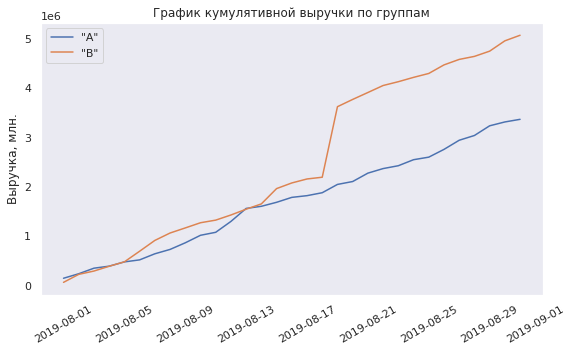

In [25]:
cumulative_revenueA= cumulative[cumulative['group']=='A'][['date', 'revenue', 'orders']]
cumulative_revenueB=cumulative[cumulative['group']=='B'][['date','revenue','orders']]
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='"А"')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label= '"B"')
plt.grid()
plt.title(r'График кумулятивной выручки по группам')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=30)
plt.legend() ;

<font color='#2F4F4F'> 
    
### Выручка увеличивается в течение всего теста, это, безусловно, хороший знак, однако, группа "B" довольно заметно вырывается вперед на ~середине теста. Также резкие точки роста могут сигнализировать о выбросах, либо о резком увеличении числа заказов.

<font color='#2F4F4F'> 

## Следующим построим график кумулятивного среднего чека по группам:

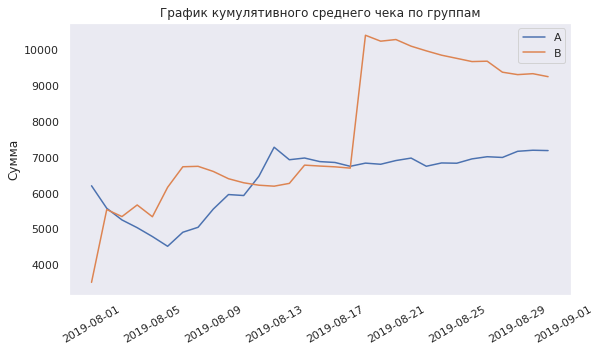

In [26]:
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue']/cumulative_revenueA['orders'], label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue']/cumulative_revenueB['orders'], label='B')
plt.grid()
plt.title(r'График кумулятивного среднего чека по группам')
plt.ylabel("Сумма")
plt.xticks(rotation=30)
plt.legend() ;
plt.legend() ;

<font color='#2F4F4F'>  
    
### Гипотеза о том, что в группе В есть выброс- значение, сильно выделяющееся на фоне других, подтверждается резким скачком на графике. Однако, на протяжении всего теста средний чек в обеих группах растет.

<font color='#2F4F4F'> 

## Следующим построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

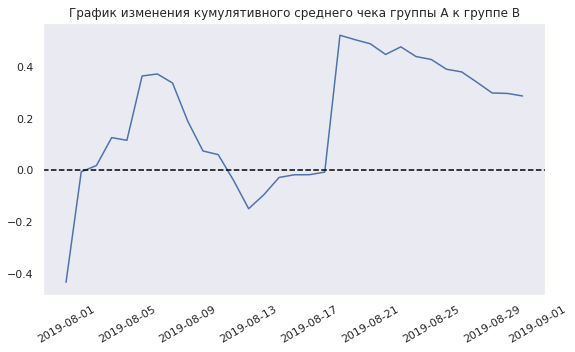

In [27]:
cumulative_revenueAB= cumulative_revenueA.merge(cumulative_revenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(cumulative_revenueAB['date'], (cumulative_revenueAB['revenueB']/cumulative_revenueAB['ordersB'])/(cumulative_revenueAB['revenueA']/cumulative_revenueAB['ordersA'])-1)
plt.grid()
plt.title(r'График изменения кумулятивного среднего чека группы А к группе B')
plt.xticks(rotation=30)
plt.axhline(y=0, color='black', linestyle='--');

<font color='#2F4F4F'>  
    
## В некоторых точках особенно заметны выбросы - значения, слишком выбивающиеся из числа остальных. От них мы избавимся чуть позже.

<font color='#2F4F4F'>   

### Cледующим построим график кумулятивного среднего количества заказов на посетителя по группам, то есть конверсию

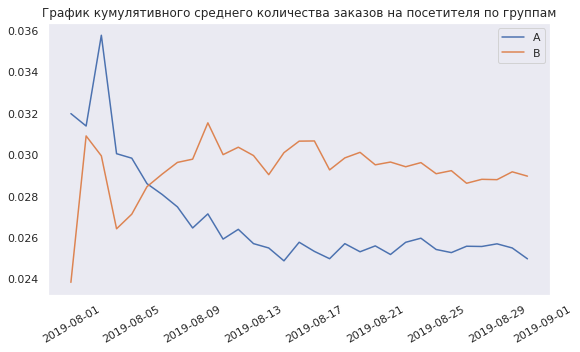

In [28]:
cumulative['conversion'] = cumulative['orders']/cumulative['visitors']

cumulative_dataA = cumulative[cumulative['group']=='A']
cumulative_dataB = cumulative[cumulative['group']=='B']

plt.plot(cumulative_dataA['date'], cumulative_dataA['conversion'], label='A')
plt.plot(cumulative_dataB['date'], cumulative_dataB['conversion'], label='B')
plt.grid()
plt.title(r'График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=30)
plt.legend();


<font color='#2F4F4F'>  

Этот график наиболее ярко показывает наличие выбросов в данных. 
    
Несмотря на скачки в начале, обе группы стабилизировались к концу теста. 
    
Конверсия группы А стабильно ниже конверсии группы B. 

<font color='#2F4F4F'>  

### Построим график относительного различия кумулятивных конверсий:

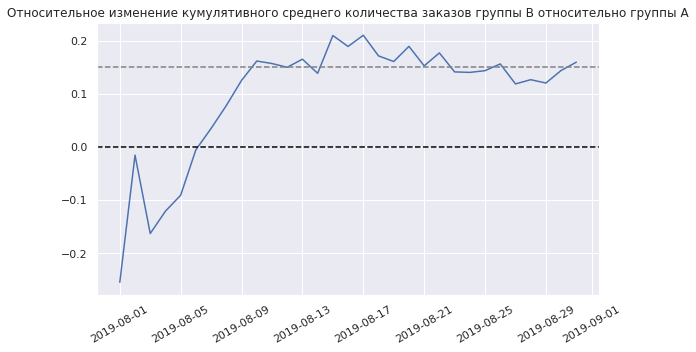

In [29]:
cumulative_conversionsAB = (
cumulative_dataA[['date','conversion']]
    .merge(cumulative_dataB[['date','conversion']], 
           left_on='date', 
           right_on='date',
           how='left', 
           suffixes=['A', 'B'])
)
plt.plot(cumulative_conversionsAB['date'],
         cumulative_conversionsAB['conversionB']/
         cumulative_conversionsAB['conversionA']-1)
plt.title(r'Относительное изменение кумулятивного среднего количества заказов группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.xticks(rotation=30);


<font color='#2F4F4F'>  
    
### В начале теста группа B проигрывала группе А, но потом значительно вырвалась вперед. Но делать какие-либо выводы рано, сначала нужно избавиться от выбросов. 

<font color='#2F4F4F'> 

## Далее посмотрим на распределение количества заказов по пользователям. Это необходимо для того, чтобы исключить тех пользователей, которые делали заказов больше, чем 90-95% пользователей. 
 
    
## Это поможет нам избавиться от значений, которые искажают результат теста.

count   973.000
mean      1.044
std       0.238
min       1.000
25%       1.000
50%       1.000
75%       1.000
max       3.000
Name: orders, dtype: float64

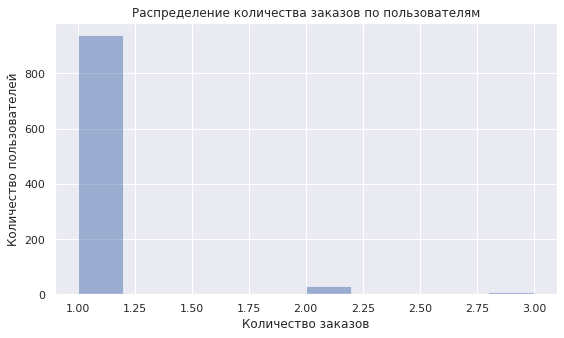

In [30]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns =  ['visitor_id', 'orders']
display(orders_by_users['orders'].describe())

plt.hist(orders_by_users['orders'], alpha=0.5) 
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()

<font color='#2F4F4F'> 
В основном делают 1 заказ, но есть и те, кто делает 3 заказа в месяц. От этих значений мы тоже избавимся.

<font color='#2F4F4F'> 
Для более наглядной визуализации построим точечный график

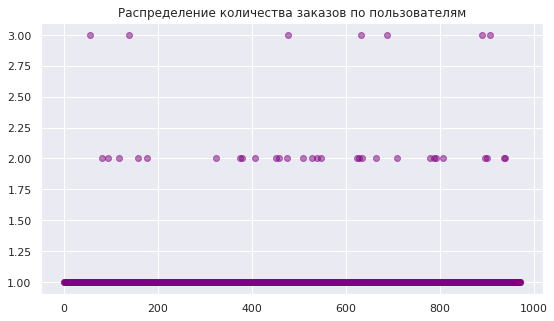

In [31]:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'], color='purple', alpha=0.5)
plt.title('Распределение количества заказов по пользователям')
plt.show()

<font color='#2F4F4F'> 
    
### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя, чтобы точно определиться с долей пользователей с тем или иным количеством заказов.

In [32]:
np.percentile(orders_by_users['orders'], [95, 99])

array([1., 2.])

<font color='#2F4F4F'> 

## Не более 1 процента пользователей делали более 2 заказов в месяц. Возьмем 2 за верхнюю границу в данном критерии.

<font color='#2F4F4F'> 

## Посмотрим на стоимость заказов по пользователям.

count       1,016.000
mean        8,300.815
std        42,121.992
min            50.000
25%         1,190.000
50%         2,955.000
75%         8,134.250
max     1,294,500.000
Name: revenue, dtype: float64

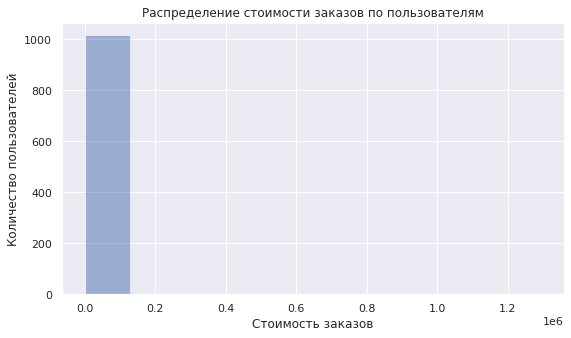

In [33]:
display(orders['revenue'].describe())
plt.hist(orders['revenue'], alpha=0.5) 
plt.title('Распределение стоимости заказов по пользователям')
plt.xlabel('Стоимость заказов')
plt.ylabel('Количество пользователей')
plt.show()

<font color='#2F4F4F'>  
   
### Один из заказов значительно отличается от остальных, почти 1.3 миллиона.. Конечно, этот заказ сильно повлияет на графики, от него нужно избавиться, иначе все результаты будут недостоверными.

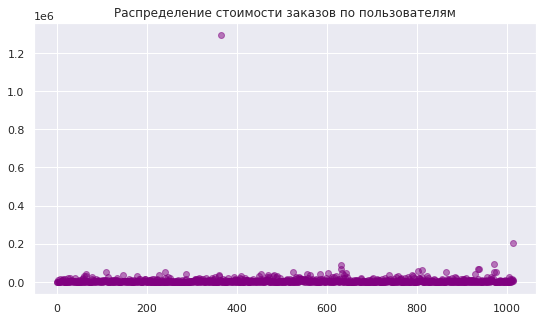

In [34]:
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders['revenue'], color='purple', alpha=0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

<font color='#2F4F4F'> 

### На графике снова видно 1 выбивающееся значение-то самое, которое искажает все графики. Есть еще несколько значений, отличающихся от других. Посмотрим, что скажут проценты.

In [35]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

<font color='#2F4F4F'> 
    
### Определим верхней границей значение 99%, то есть 53000.

<font color='#2F4F4F'>
    
## Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным, то есть не удаляя пользователей, которые значительно выбиваются из числа остальных.
    
Использовать для этого мы будем тест Манна-Уитни, так как он непараметрический, то есть работает с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Это подойдет и нам, так как работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты.

<font color='#2F4F4F'> 

### Начнём с подготовки данных. 

In [36]:
visitors_dailyA = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_dailyA.columns = ['date', 'visitors_per_dateA']

visitors_cummulativeA = visitors_dailyA.apply(
    lambda x: visitors_dailyA[visitors_dailyA['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_dateA': 'sum'}
    ),
    axis=1,
)
visitors_cummulativeA.columns = ['date', 'visitors_cummulativeA']

visitors_dailyB = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_dailyB.columns = ['date', 'visitors_per_dateB']

visitors_cummulativeB = visitors_dailyB.apply(
    lambda x: visitors_dailyB[visitors_dailyB['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_dateB': 'sum'}
    ),
    axis=1,
)
visitors_cummulativeB.columns = ['date', 'visitors_cummulativeB']

orders_dailyA = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_dailyA.columns = ['date', 'orders_per_dateA', 'revenue_per_dateA']

orders_cummulativeA = orders_dailyA.apply(
    lambda x: orders_dailyA[orders_dailyA['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_dateA': 'sum', 'revenue_per_dateA': 'sum'}
     ),
    axis=1,
).sort_values(by=['date'])
orders_cummulativeA.columns = [
    'date',
    'orders_cummulativeA',
    'revenue_cummulativeA',
]

orders_dailyB = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_dailyB.columns = ['date', 'orders_per_dateB', 'revenue_per_dateB']

orders_cummulativeB = orders_dailyB.apply(
    lambda x: orders_dailyB[orders_dailyB['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_dateB': 'sum', 'revenue_per_dateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulativeB.columns = [
    'date',
    'orders_cummulativeB',
    'revenue_cummulativeB',
]

data = (
    orders_dailyA.merge(
        orders_dailyB, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulativeA, left_on='date', right_on='date', how='left')
    .merge(orders_cummulativeB, left_on='date', right_on='date', how='left')
    .merge(visitors_dailyA, left_on='date', right_on='date', how='left')
    .merge(visitors_dailyB, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulativeA, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulativeB, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  orders_per_dateA  revenue_per_dateA  orders_per_dateB  \
0 2019-08-01                23             142779                17   
1 2019-08-02                19              91602                23   
2 2019-08-03                24             112473                14   
3 2019-08-04                11              41176                14   
4 2019-08-05                22              86383                21   

   revenue_per_dateB  orders_cummulativeA  revenue_cummulativeA  \
0              59758                   23                142779   
1             162043                   42                234381   
2              67049                   66                346854   
3              96890                   77                388030   
4              89908                   99                474413   

   orders_cummulativeB  revenue_cummulativeB  visitors_per_dateA  \
0                   17                 59758                 719   
1                   40            

<font color='#2F4F4F'>  

### Получилась у нас следующая таблица:
    
    
- date — дата;
    
    
- orders_per_dateA — количество заказов в выбранную дату в группе A;
    
    
- revenue_per_dateA — суммарная выручка в выбранную дату в группе A;
    
    
- orders_per_dateB — количество заказов в выбранную дату в группе B;
    
    
- revenue_per_dateB — суммарная выручка в выбранную дату в группе B;
    
    
- orders_cummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
    
    
- revenue_cummulativeA — суммарная выручка до выбранной даты включительно в группе A;
    
    
- orders_cummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
    
    

- revenue_cummulativeB — суммарная выручка до выбранной даты включительно в группе B;
    
    
- visitors_per_dateA — количество пользователей в выбранную дату в группе A;
    
    
- visitors_per_dateB — количество пользователей в выбранную дату в группе B;
    
    
- visitors_cummulativeA — количество пользователей до выбранной даты включительно в группе A;
    
    
- visitors_cummulativeB — количество пользователей до выбранной даты включительно в группе B.date — дата;


<font color='#2F4F4F'>  

## Теперь посчитаем статистическую значимость различия в среднем количестве заказов между группами.
     
    
Для этого сформируем основную и альтернативную гипотезу.
    
Нулевая гипотеза будет звучать следующим образом:
    
"Разницы в среднем количестве заказов на посетителя между группами нет"
    
    
Альтернативной гипотезой будет:
    
    
"Разница в среднем количестве заказов на посетителя между группами есть"
    
Уровень статистической значимости я поставлю 0.05

<font color='#2F4F4F'>
    
Создадим переменные orders_by_usersA и orders_by_usersA. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [37]:
orders_by_usersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_usersA.columns =  ['visitor_id', 'orders']

orders_by_usersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_usersB.columns =  ['visitor_id', 'orders']

<font color='#2F4F4F'>
    
Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [38]:
sampleA = pd.concat([orders_by_usersA['orders'],pd.Series(0, index=np.arange(data['visitors_per_dateA'].sum() - len(orders_by_usersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_by_usersB['orders'],pd.Series(0, index=np.arange(data['visitors_per_dateB'].sum() - len(orders_by_usersB['orders'])), name='orders')],axis=0)

In [39]:
print("P-value: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("Относительный прирост В к А: {0:.3%}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.011
Относительный прирост В к А: 15.980%


<font color='#2F4F4F'>

### Итак, p-value меньше 0.5, потому нулевую гипотезу "Разницы в среднем количестве заказов на посетителя между группами нет" мы отвергаем.
    
### При этом выигрыш группы B равен 15.98%

<font color='#2F4F4F'>

## Далее посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 
    
Нулевая гипотеза будет звучать следующим образом:
    
"Разницы в среднем чеке заказа между группами нет"
    
    
Альтернативной гипотезой будет:
    
    
"Разница в среднем чеке заказа между группами есть"

In [40]:
print('P-value: {0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост В к А: {0:.3%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.829
Относительный прирост В к А: 28.660%


<font color='#2F4F4F'>

### Итак, p-value значительно больше 0.5, потому основную гипотезу "Разницы в среднем чеке заказа между группами нет" мы отвергнуть не можем, на это нет оснований.
    
    
### Однако средний чек группы B выше на 28.6%

<font color='#2F4F4F'>

## Сделаем то же самое с очищенными данными, то есть исключив все выбросы.

<font color='#2F4F4F'>
    
Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 53000. Сделаем срезы пользователей с числом заказов больше 2 — too_many_orders и пользователей, совершивших заказы дороже 53000 — too_expensive. Объединим их в таблице abnormalUsers.

In [41]:
too_many_orders = pd.concat(
    [
        orders_by_usersA[orders_by_usersA['orders'] > 2]['visitor_id'],
        orders_by_usersB[orders_by_usersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
too_expensive = orders[orders['revenue'] > 53000]['visitor_id']
abnormalUsers = (
    pd.concat([too_many_orders, too_expensive], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5)) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64


In [42]:
sampleA_filtered = pd.concat(
    [
        orders_by_usersA[
            np.logical_not(orders_by_usersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_dateA'].sum() - len(orders_by_usersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB_filtered = pd.concat(
    [
        orders_by_usersB[
            np.logical_not(orders_by_usersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_dateB'].sum() - len(orders_by_usersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

<font color='#2F4F4F'>


Нулевая гипотеза будет звучать следующим образом:
    
"Разницы в среднем количестве заказов на посетителя между группами в очищенных данных нет"
    
    
Альтернативной гипотезой будет:
    
    
"Разница в среднем количестве заказов на посетителя между группами в очищенных данных есть"

In [43]:
print('P-value: {0:.3f}'.format(st.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1]))
print('Относительный прирост В к А: {0:.3%}'.format(sampleB_filtered.mean()/sampleA_filtered.mean()-1))

P-value: 0.006
Относительный прирост В к А: 19.226%


<font color='#2F4F4F'> 

### Разница между группами по-прежнему есть, прирост группы B увеличился на 4 процентных пункта.

<font color='#2F4F4F'>

## Далее посчитаем статистическую значимость различий в среднем чеке заказа между группами по очищенным данным. 
    
нулевая гипотеза будет звучать следующим образом:
    
"Разницы в среднем чеке заказа между группами в очищенных данных нет"
    
    
Альтернативной гипотезой будет:
    
    
"Разница в среднем чеке заказа между группами в очищенных данных есть"

In [44]:
print(
    'P-value: {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный прирост В к А: {0:.3%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.842
Относительный прирост В к А: -1.368%


<font color='#2F4F4F'>
    
    
P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу "Разницы в среднем чеке заказа между группами в очищенных данных нет" нет. Различие в средних чеках минимально.

<font color='#2F4F4F'>

## Вывод данного этапа:
    
Я проанализировала очищенные и сырые данные, посчитала статистическую значимость различий в среднем чеке и средней конверсии для групп на очищенных и сырых данных.
    
И на очищенных, и на сырых данных мы можем сделать одинаковый вывод:
    
- Разница в конверсиях есть, у группы B конверсия выше.
    
- Разницы в среднем чеке заказа между группами нет, различие в средних чеках минимально.

<font color='#2F4F4F'>
    
# Вывод исследования:
    
В рамках данного исследования я проанализировала 9 гипотез, а также запустила A/B тест и проанализировала его результаты.
    
    
Исследование проходило в несколько этапов, и я сделала следующие шаги и получила следующие выводы:
    
- Изучила данные и информацию о них, необходимую для анализа
    
 
- Сделала предобработку данных для удобного и корректного их использования (изменила тип данных, отсеяла пользователей, которые попали в обе группы)
    

- Применила фреймворки ICE и RICE к 9 гипотезам и выявила приоритетные
    
    
- Проанализировала A/B тест, а именно проанализировала следующие параметры по группам:
    
    
* кумулятивную выручку
    
    
* кумулятивный средний чек
    

* кумулятивное среднее количество заказов на посетителя по группам
    
    
* стоимость заказов
    
    
- Посчитатала статистическую значимость различий в среднем количестве заказов на посетителя по группам на "сырых" и "очищенных" данных
    
    
- Посчитала статистическую значимость различий в среднем чеке заказа на посетителя по группам на "сырых" и "очищенных" данных
    
    
    
## Рекомендации по результатам данного исследования:
    
 
### Приоритет стоит отдать следующим гипотезам: 
    
    
- "Запустить акцию, дающую скидку на товар в день рождения",
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",
- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
    
    
### Если ранжирование гипотез должно включать в себя и охват пользователей интернет-магазина, то приоритет стоит отдать следующим гипотезам:

- "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",
- "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",
- "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".
    
    
## A/B тест
    
     
И на очищенных, и на сырых данных мы можем сделать одинаковый вывод:
    
- Разница в конверсиях есть, у группы B конверсия выше.
    
- Разницы в среднем чеке заказа между группами нет, различие в средних чеках минимально.
    
    
График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А

### Учитывая все вышеперечисленные выводы, наиболее верным мне кажется решение остановить тест, зафиксировав победу группы B, так как ее конверсия значительно выше группы А.